# DM Lesson 6  -   Données Medecins 

**En guise d'exercice, je vous propose un sujet assez ouvert, semblable à ce qu'on fera le 22/11 :
Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement
d'honoraires ? Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les
dépassements d'honoraires ? Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de
population pour certaines classes d'âges (bébé/pédiatre, personnes âgées / infirmiers etc...) ?
C'est un sujet issu du Hackathon "données de santé" de Etalab (la page contient des liens vers différents jeux de
données utiles, ainsi que d'autres exemples de questions que vous pouvez préférer aborder). Vous pouvez compléter
ça avec des données de l'INSEE et des données sur la démographie des médecins.**

In [48]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 31 19:03:53 2019
DM lesson 6
@author: kaelig castor
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns
 
filename = "0_Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2017.csv"
df = pd.read_csv(filename,sep=",", encoding='latin-1')
df.shape
df = df.rename(columns={'HONORAIRES SANS DEPASSEMENT (Euros)': 'Hon_ss_depass',
                        'DEPARTEMENT':'Dept','DEPASSEMENTS (Euros)':'Depass',
                        'EFFECTIFS':'Eff','FRAIS DE DEPLACEMENT (Euros)':"Frais_depl", 
                        'TOTAL DES HONORAIRES (Euros)':'Tot_hon'})

In [49]:
# CLEANING
df.Hon_ss_depass=df.Hon_ss_depass.str.replace(" ","")
df=df[df["Hon_ss_depass"].str.contains('nc') == False]
df=df[df["Spécialistes"].str.contains('Total|TOTAL') == False]
df=df[df["Dept"].str.contains('Total|TOTAL') == False]
df['Hon_ss_depass'] = df['Hon_ss_depass'].apply(lambda x: float(x.replace('\xa0','')))
df["Hon_ss_depass"] = df["Hon_ss_depass"].astype(int)
df['Depass'] = df['Depass'].apply(lambda x: float(x.replace('\xa0','')))
df["Depass"] = df["Depass"].astype(int)
df['Frais_depl'] = df['Frais_depl'].apply(lambda x: float(x.replace('\xa0','')))
df["Frais_depl"] = df["Frais_depl"].astype(int)
df['Tot_hon'] = df['Tot_hon'].apply(lambda x: float(x.replace('\xa0','')))
df["Tot_hon"] = df["Tot_hon"].astype(int)
df["Eff"] = df["Eff"].astype(int)
df=df[df["Eff"]!= 0]
#df["Tot_hon"] = df["Tot_hon"].apply(lambda s: float(s))
df.sort_values(by=['Eff'], ascending=False)
df = df.drop_duplicates(subset=['Dept','Eff','Hon_ss_depass','Depass','Tot_hon']).reset_index()
dfChild=df[df['Spécialistes'].str.contains('PEDIATRIE|Pédiatrie|infantile|de l|enfant')]
dfChild=dfChild.groupby('Spécialistes').sum()
SumChild=dfChild.agg(['sum'])
print(SumChild)
dfChild.append(SumChild)
depassementChild=dfChild.Depass>dfChild.Hon_ss_depass
print(depassementChild)

dfWom=df[df['Spécialistes'].str.contains('obstétri|Gynéco')]
dfWom =dfWom.groupby('Spécialistes').sum()
SumWom=dfWom.agg(['sum'])
print(SumWom)
dfWom.append(SumWom)
depassementWom=dfWom.Depass>dfWom.Hon_ss_depass
print(depassementWom)

dfOld=df[df['Spécialistes'].str.contains('Gériatrie|GERIATRIE')]
dfOld=dfOld.groupby('Spécialistes').sum()
SumOld=dfOld.agg(['sum'])
print(SumOld)
dfOld.append(SumOld)
depassementOld=dfOld.Depass>dfOld.Hon_ss_depass
print(depassementOld)

MaskChild=df['Spécialistes'].str.contains('PEDIATRIE|Pédiatrie|infantile|de l|enfant')
IndChild = df.Spécialistes.loc[MaskChild].index
df.Spécialistes.iloc[IndChild] = 'Children'
MaskWom=df['Spécialistes'].str.contains('obstétri|Gynéco')
IndWom = df.Spécialistes.loc[MaskWom].index
df.Spécialistes.iloc[IndWom] = 'Women'
MaskOld=df['Spécialistes'].str.contains('Gériatrie|GERIATRIE')
IndOld = df.Spécialistes.loc[MaskOld].index
df.Spécialistes.iloc[IndOld] = 'Old'
# AllMask = MaskChild+MaskWom+MaskOld
# AllInd = df.Spécialistes.loc[AllMask].index
list(df)
df.head()
#df5 = df.loc[AllInd,['Spécialistes','Dept','Hon_ss_depass','Depass','Eff']]
df5 = df.loc[:,['Spécialistes','Dept','Hon_ss_depass','Depass','Eff']]
df5["Dept"]= df5["Dept"].str.split("-", n = 1, expand = True) 

# POPULATION DENSITY
filename = "0_DensFromWiki.csv"
df3 = pd.read_csv(filename,sep=",", encoding='latin-1')
df3.shape
df4 = df3.loc[:,['DeptCode','DeptName','DensPop']]
list(df4)
df4.head()

      index   Eff  Hon_ss_depass    Depass  Frais_depl    Tot_hon
sum  207462  2480      293271070  66588064       13650  359872784
Spécialistes
12- Pédiatrie                                     False
43- Chirurgie infantile                           False
75- Psychiatrie de l'enfant et de l'adolescent    False
dtype: bool
      index   Eff  Hon_ss_depass     Depass  Frais_depl    Tot_hon
sum  264230  4406      668764562  297336316         792  966101665
Spécialistes
07- Gynécologie obstétrique                            False
70- Gynécologie médicale                               False
79- Gynécologie obstétrique et gynécologie médicale    False
dtype: bool
     index  Eff  Hon_ss_depass  Depass  Frais_depl  Tot_hon
sum   5379   11         299586  512060        8826   820471
Spécialistes
34-Gériatrie    True
dtype: bool


,DeptCode,DeptName,DensPop
0,59,Nord,454
1,75,Paris,21014
2,13,Bouches-du-Rhône,396
3,69,Circonscription départementale du Rhône,561
4,93,Seine-Saint-Denis,6748


**On note donc que la pratique du dépassement d'honoraire est moins présente que la tarification sans dépassement. Le dépassement d'honoraire se pratique peu pour pour les spécialistés liés aux enfants, de manière assez importante pour les spécialités liées aux femmes, et de manière extrêmement importante pour les spécialités liées aux personnes agées.**

In [50]:
# MERGE DATABASES
DB = df5.merge(df4, left_on='Dept', right_on='DeptCode', suffixes=(False, False))
list(DB)
DB.to_csv('Clean.csv')
DB.head()
DB.dtypes

Spécialistes     object
Dept             object
Hon_ss_depass     int64
Depass            int64
Eff               int64
DeptCode         object
DeptName         object
DensPop           int64
dtype: object

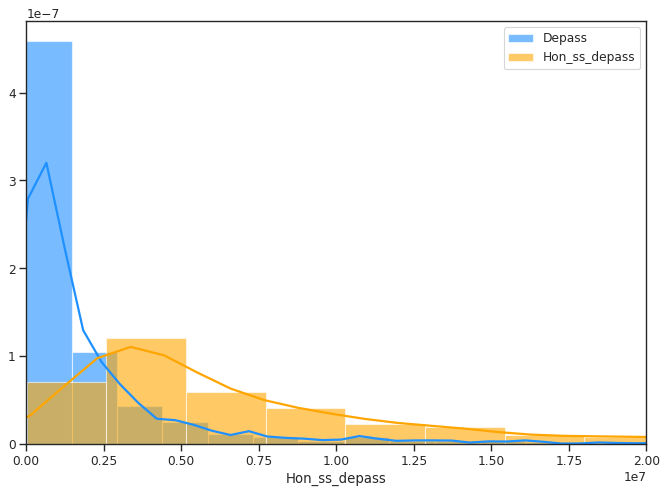

In [51]:
x1 = DB.Depass 
x2 = DB.Hon_ss_depass 
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Depass", **kwargs)
sns.distplot(x2, color="orange", label="Hon_ss_depass", **kwargs)
plt.xlim(0,20000000)
plt.legend();

**La figure ci-dessus montre, qu'en général, on ne constate que très peu de dépassement d'honoraire.**

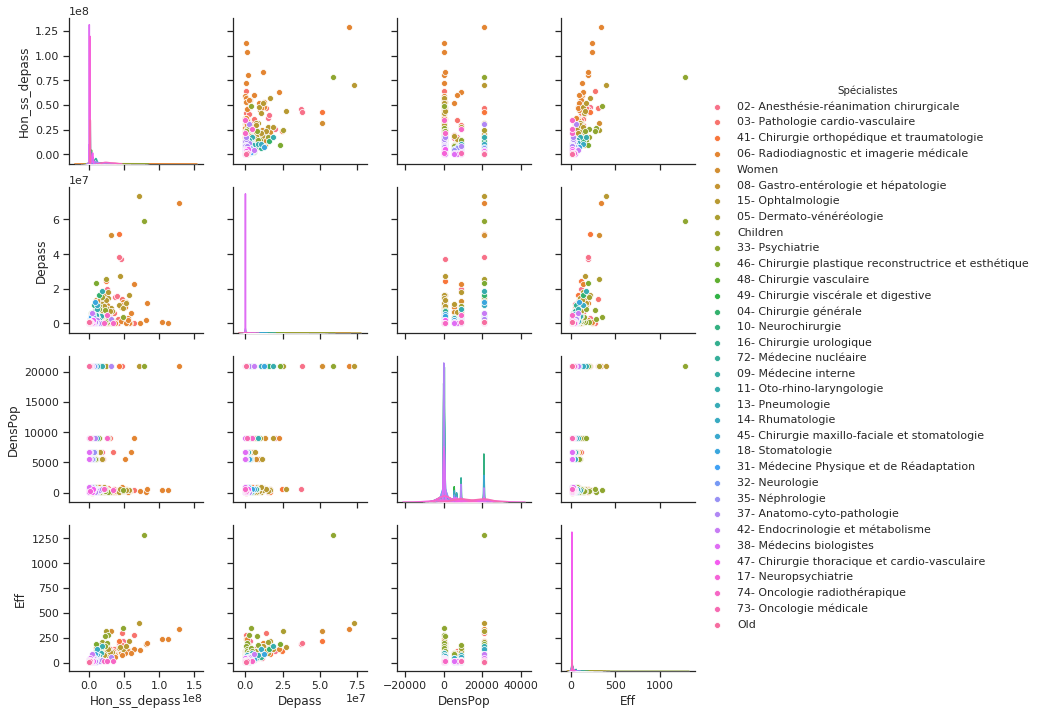

In [52]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(DB[['Spécialistes','Hon_ss_depass','Depass','Dept','DensPop','Eff']], hue = 'Spécialistes', diag_kind="kde",palette="husl")

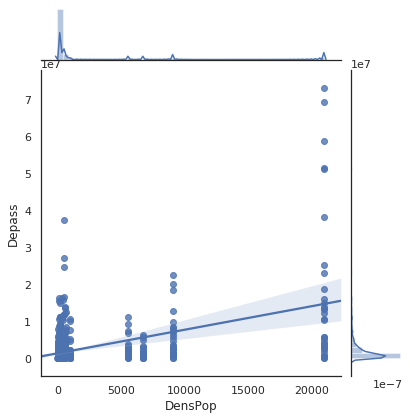

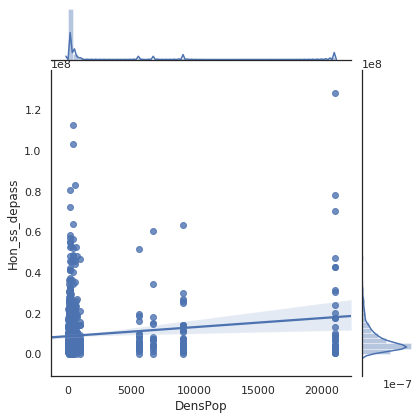

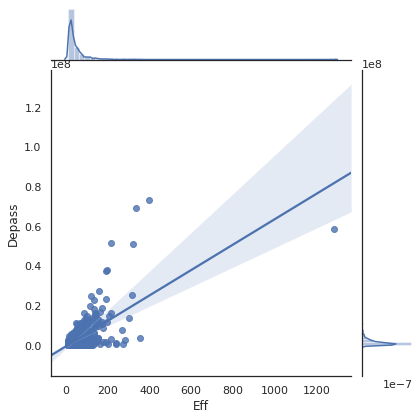

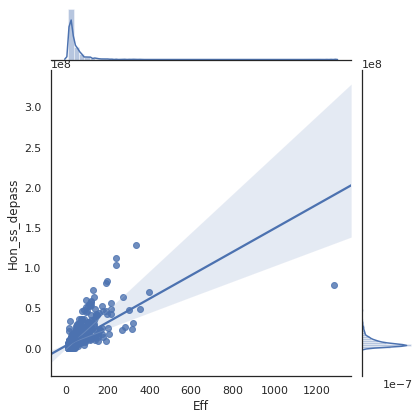

In [53]:
with sns.axes_style('white'):
    sns.jointplot("DensPop", "Depass",  data=DB, kind='reg')  
with sns.axes_style('white'):
    sns.jointplot("DensPop", "Hon_ss_depass",  data=DB, kind='reg')  
    
with sns.axes_style('white'):
    sns.jointplot("Eff", "Depass",  data=DB, kind='reg')  
with sns.axes_style('white'):
    sns.jointplot("Eff", "Hon_ss_depass",  data=DB, kind='reg')   

**Les figures ci-dessus montrent que plus l'effectif de médecins est élevé, plus le dépassement d'horaires se pratique.**

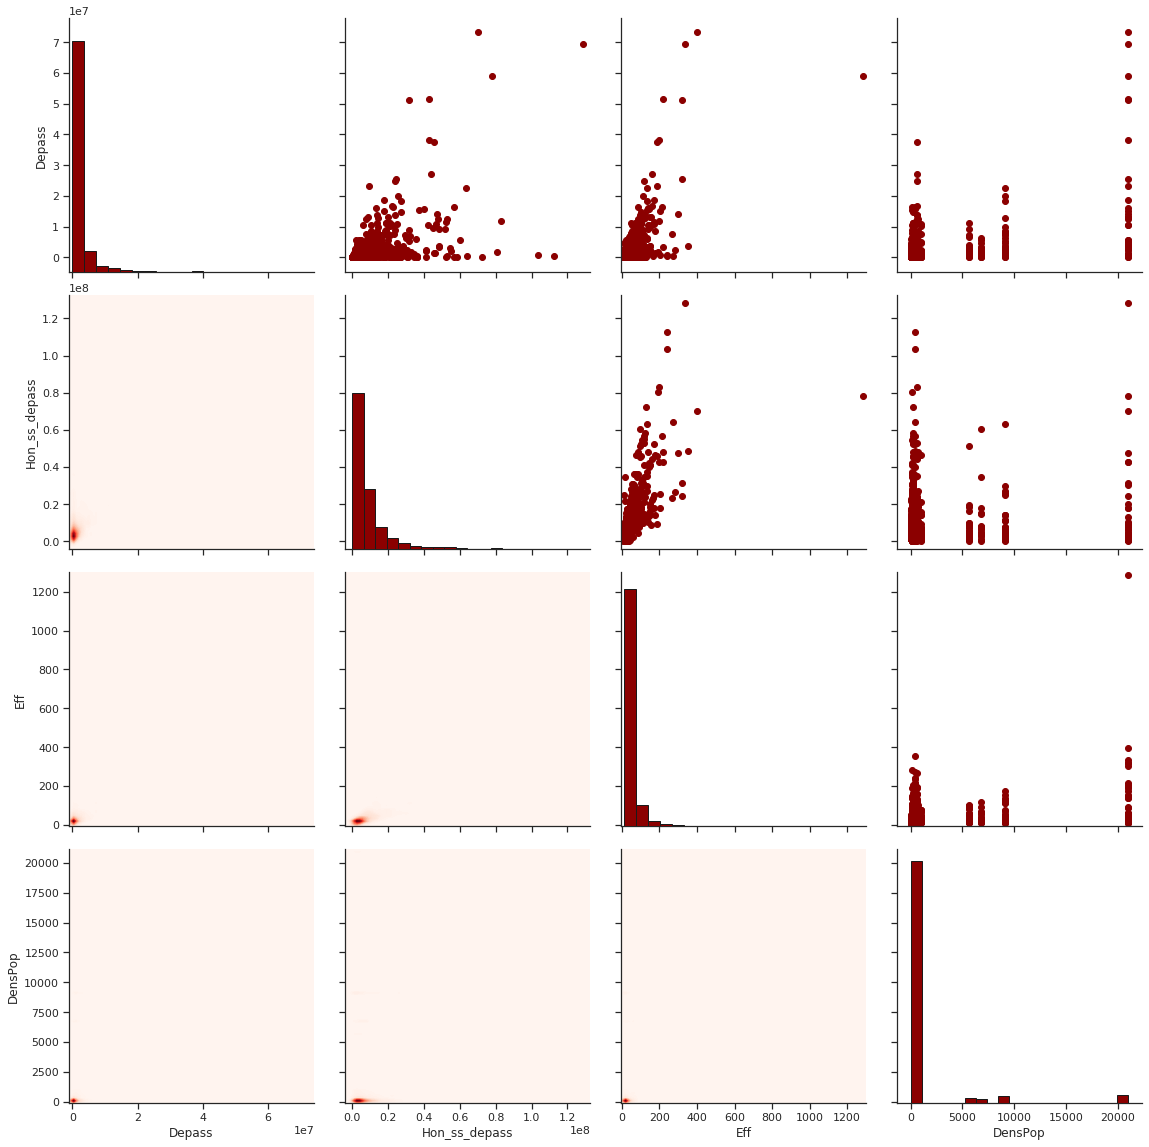

In [54]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=DB,
                    vars = ['Depass','Hon_ss_depass', "Eff",'DensPop', 
                    ], size = 4)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred') 
# Map a histogram on the diagonal
grid = grid.map_diag(plt.hist, bins = 20, color = 'darkred', 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot,shade=True,cmap='Reds',n_levels=100)

(0, 200)

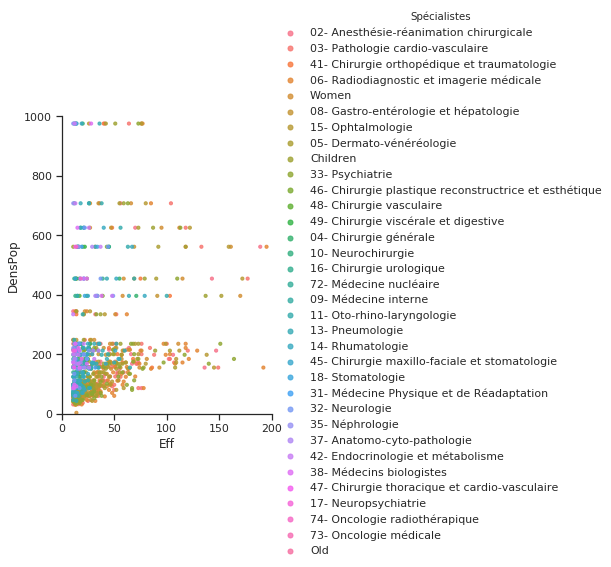

In [55]:
sizes = [10, 40, 70, 100] 
marker_size = pd.cut(DB['DensPop'], range(0, 2500, 500), labels=sizes) 
sns.lmplot('Eff', 'DensPop', data=DB, hue='Spécialistes', fit_reg=False, scatter_kws={'s':marker_size})
plt.ylim((0, 1000))
plt.xlim((0, 200))

(0, 20000000.0)

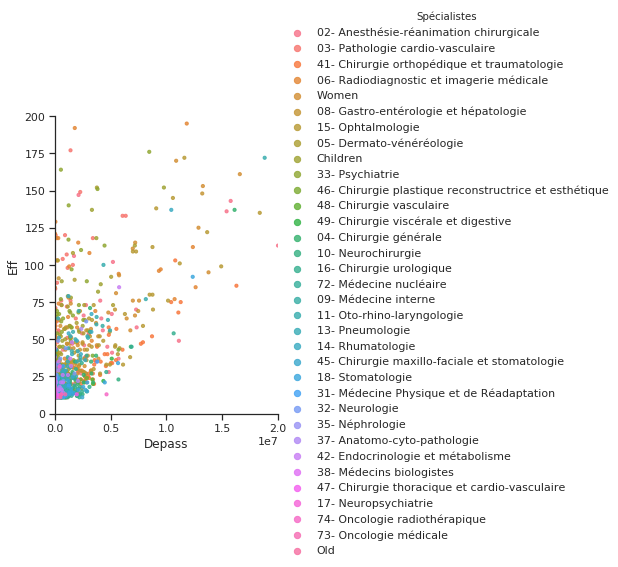

In [56]:
marker_size = pd.cut(DB['Eff'], range(0, 2500, 500), labels=sizes) 
sns.lmplot('Depass', 'Eff', data=DB, hue='Spécialistes', fit_reg=False, scatter_kws={'s':marker_size}   )
plt.ylim((0, 200))
plt.xlim((0, 2e7 ))